In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from collections import Counter
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Import the dataset

<ipython-input-23-11b977a1a6b3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


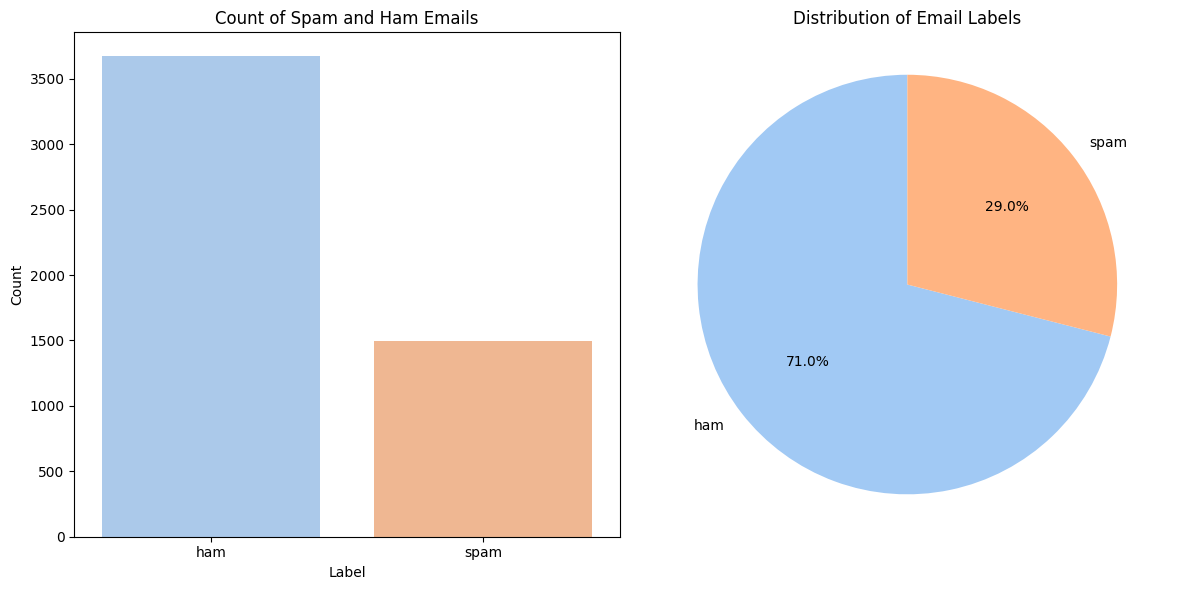

In [ ]:
df=pd.read_csv('data/spam_ham_dataset.csv')
df.head()
plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Count of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Email Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

In [ ]:
df.isna().sum() #check for missing value

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [ ]:
df.shape

(5171, 4)

There are no duplicate rows in the dataset.


<ipython-input-21-75f84ecdff29>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Count', data=duplicate_counts_df, palette='pastel')


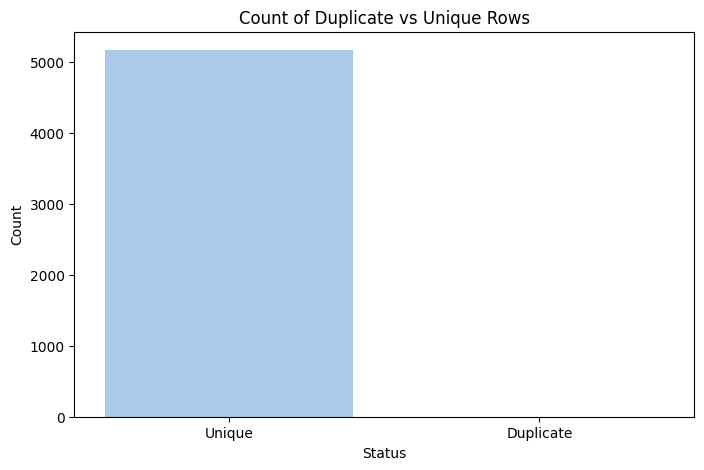

In [ ]:
# Count duplicates
duplicate_counts = df.duplicated().value_counts()  # Counts of duplicate and unique rows

# Prepare data for visualization
duplicate_counts_df = pd.DataFrame({
    'Status': ['Unique', 'Duplicate'],
    'Count': [duplicate_counts.get(False, 0), duplicate_counts.get(True, 0)]  # Safe access to counts
})

# Check if there are no duplicates
if duplicate_counts_df['Count'][1] == 0:
    print("There are no duplicate rows in the dataset.")
else:
    print("There are duplicate rows in the dataset.")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Status', y='Count', data=duplicate_counts_df, palette='pastel')
plt.title('Count of Duplicate vs Unique Rows')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The dataset is already clean, so there is no need to preprocessing it.

Tokenize and clean every sentences

In [ ]:
df.replace({r'\r\n':' '}, regex=True, inplace=True)

ps = PorterStemmer()
corpus = []

all_stop_words = set(stopwords.words('english'))
all_stop_words.remove('not')

for i in range (len(df)):
    text = df['text'][i].lower().translate(str.maketrans('','', string.punctuation)).split()
    text = [ps.stem(word) for word in text if word not in all_stop_words]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
mostCommon = Counter(corpus).most_common(20)
# mostCommon
cv = CountVectorizer(max_features= 42500)
X = cv.fit_transform(corpus).toarray()
y = df['label_num']
len(X[0])

42500

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

RANDOM FOREST CLASSIFIER

In [ ]:
cl_rf = RFR(n_estimators=100, random_state=42)
cl_rf.fit(X_train, y_train)
y_pred = cl_rf.predict(X_test)

MODEL PERFORMANCE


In [ ]:
def model_score(y_true,y_pred):
    acc_scor = accuracy_score(y_true, y_pred)
    prec_scor = precision_score(y_true, y_pred)
    recall_scor = recall_score(y_true, y_pred)
    f1_scor = f1_score(y_true, y_pred)
    overall_avg_score = (acc_scor + prec_scor + recall_scor + f1_scor) / 4

    print(f'Model accuracy score: {acc_scor}')
    print(f'Model precision score: {prec_scor}')
    print(f'Model recall score: {recall_scor}')
    print(f'Model f1 score: {f1_scor}')
    print(f'Average overall score performance: {overall_avg_score}')

    print(confusion_matrix(y_true, y_pred))

model_score(y_test,y_pred)

Model accuracy score: 0.9719806763285024
Model precision score: 0.9506578947368421
Model recall score: 0.9537953795379538
Model f1 score: 0.9522240527182867
Average overall score performance: 0.9571645008303963
[[717  15]
 [ 14 289]]


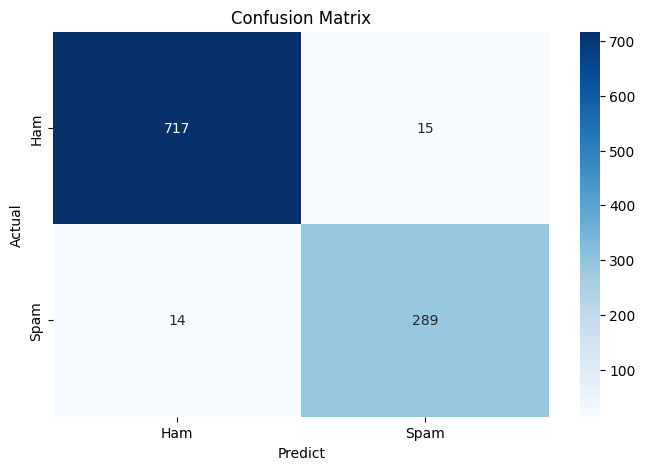

In [25]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()
